# Import Library dan file yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [2]:
columns_name =['Gender','Umur','Pekerjaan','Edukasi','Tempat_Tinggal',
               'Bengkak','Kemerahan','Gatal','Demam','Pusing','Nyeri_Otot',
               'Kelelahan','Batuk','Diare','Mual_Muntah','Sesak','Nyeri_Sendi',
               'Pingsan','Anaphylactic','Geli','Getah_Bening','Lama']


data = pd.read_excel("3SI1_Dataset 03_Gejala Ikutan Vaksin.xlsx")
data.columns = columns_name

# Proses pengecekan data dan Cleaning data
Melihat data secara garis besar untuk menjadi panduan apa yang harus dilakukan dalam prosessing data

In [3]:
data.head(3)

,Gender,Umur,Pekerjaan,Edukasi,Tempat_Tinggal,Bengkak,Kemerahan,Gatal,Demam,Pusing,...,Batuk,Diare,Mual_Muntah,Sesak,Nyeri_Sendi,Pingsan,Anaphylactic,Geli,Getah_Bening,Lama
0,Male,51-55 years,Medical specialist,Master degree,Downtown,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,None
1,Female,41-45 years,Non medical staff,Master degree,Downtown,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,None
2,Male,56-60 years,Medical doctor,NaN,Downtown,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,< 24 hours


## Jumlah data yang null untuk tiap baris (dalam persen)

In [4]:
data.isna().sum()*100/449

Gender            0.000000
Umur              0.000000
Pekerjaan         0.000000
Edukasi           0.445434
Tempat_Tinggal    0.000000
Bengkak           0.222717
Kemerahan         0.222717
Gatal             0.000000
Demam             0.000000
Pusing            0.000000
Nyeri_Otot        0.222717
Kelelahan         0.222717
Batuk             0.000000
Diare             0.000000
Mual_Muntah       0.000000
Sesak             0.000000
Nyeri_Sendi       0.000000
Pingsan           0.000000
Anaphylactic      0.000000
Geli              0.445434
Getah_Bening      0.000000
Lama              0.000000
dtype: float64

Tidak ada kolom yang jumlah null nya > 1 persen, saran mending dibuang aja keknya soalnya paling jumlah data sisa 98 persen dan luamayan masih banyak

In [5]:
data = data.dropna()
data.isna().sum()

Gender            0
Umur              0
Pekerjaan         0
Edukasi           0
Tempat_Tinggal    0
Bengkak           0
Kemerahan         0
Gatal             0
Demam             0
Pusing            0
Nyeri_Otot        0
Kelelahan         0
Batuk             0
Diare             0
Mual_Muntah       0
Sesak             0
Nyeri_Sendi       0
Pingsan           0
Anaphylactic      0
Geli              0
Getah_Bening      0
Lama              0
dtype: int64

In [6]:
len(data)

444

## Jumlah data unik pada tiap kolom

In [7]:
data.nunique()

Gender             2
Umur              10
Pekerjaan          5
Edukasi            4
Tempat_Tinggal     2
Bengkak            2
Kemerahan          2
Gatal              1
Demam              2
Pusing             2
Nyeri_Otot         2
Kelelahan          2
Batuk              2
Diare              2
Mual_Muntah        2
Sesak              2
Nyeri_Sendi        2
Pingsan            1
Anaphylactic       2
Geli               2
Getah_Bening       2
Lama               4
dtype: int64

## Gatal dan Bengkak cuman 1 nilai

In [8]:
data.Gatal.value_counts()

No    444
Name: Gatal, dtype: int64

In [9]:
data.Pingsan.value_counts()

No    444
Name: Pingsan, dtype: int64

In [10]:
data = data.drop(columns=['Pingsan','Gatal'])

In [11]:
data.head(3)

,Gender,Umur,Pekerjaan,Edukasi,Tempat_Tinggal,Bengkak,Kemerahan,Demam,Pusing,Nyeri_Otot,Kelelahan,Batuk,Diare,Mual_Muntah,Sesak,Nyeri_Sendi,Anaphylactic,Geli,Getah_Bening,Lama
0,Male,51-55 years,Medical specialist,Master degree,Downtown,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,None
1,Female,41-45 years,Non medical staff,Master degree,Downtown,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,None
4,Female,31-35 years,Medical doctor,Bachelor degree,Downtown,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,< 24 hours


# EDA

## Get_dummies

In [12]:
dummies_gender = pd.get_dummies(data.Gender)

In [13]:
data.Umur = data.Umur.replace(['> 60 years','56-60 years','51-55 years','46-50 years'],['> 45 years','> 45 years','> 45 years','> 45 years'])

In [14]:
data.Umur = data.Umur.replace(['< 20 years','20-25 years','26-30 years'],['< 30 years','< 30 years','< 30 years'])

In [15]:
data.Umur = data.Umur.replace(['26-30 years','31-35 years','36-40 years','41-45 years'],['31-45 years','31-45 years','31-45 years','31-45 years'])

In [16]:
dummies_Umur = pd.get_dummies(data.Umur)
#data.Umur = data.Umur.replace(['< 30 years','31-45 years','> 45 years'],[1,2,3])

In [17]:
# dummies_pekerjaan = pd.get_dummies(data.Pekerjaan)

In [18]:
dummies_Edukasi = pd.get_dummies(data.Edukasi)

In [19]:
dummies_tempattinggal = pd.get_dummies(data.Tempat_Tinggal)

In [20]:
#data = pd.concat([data,dummies_gender,dummies_Umur,dummies_pekerjaan,dummies_Edukasi,dummies_tempattinggal],axis=1)
data = pd.concat([data],axis=1)

In [21]:
data = data.drop(columns=['Gender','Umur','Pekerjaan','Edukasi','Tempat_Tinggal'])

## Menjadikan simpton 1 dan 0

In [22]:
data.Bengkak = data.Bengkak.replace(['No','Yes'],[0,1])

In [23]:
data.Kemerahan = data.Kemerahan.replace(['No','Yes'],[0,1])

In [24]:
data.Demam = data.Demam.replace(['No','Yes'],[0,1])

In [25]:
data.Pusing = data.Pusing.replace(['No','Yes'],[0,1])

In [26]:
data.Nyeri_Otot = data.Nyeri_Otot.replace(['No','Yes'],[0,1])

In [27]:
data.Kelelahan = data.Kelelahan.replace(['No','Yes'],[0,1])

In [28]:
data.Batuk = data.Batuk.replace(['No','Yes'],[0,1])

In [29]:
data.Diare = data.Diare.replace(['No','Yes'],[0,1])

In [30]:
data.Mual_Muntah = data.Mual_Muntah.replace(['No','Yes'],[0,1])

In [31]:
data.Sesak = data.Sesak.replace(['No','Yes'],[0,1])

In [32]:
#data.Nyeri_Sendi = data.Nyeri_Sendi.replace(['No','Yes'],[0,1])
data = data.drop(columns='Nyeri_Sendi')

In [33]:
data.Anaphylactic = data.Anaphylactic.replace(['No','Yes'],[0,1])
#data = data.drop(columns='Anaphylactic')

In [34]:
data.Geli = data.Geli.replace(['No','Yes'],[0,1])

In [35]:
#data.Getah_Bening = data.Getah_Bening.replace(['No','Yes'],[0,1])
data = data.drop(columns='Getah_Bening')

In [36]:
data.head(3)

,Bengkak,Kemerahan,Demam,Pusing,Nyeri_Otot,Kelelahan,Batuk,Diare,Mual_Muntah,Sesak,Anaphylactic,Geli,Lama
0,0,0,0,0,1,1,0,0,0,0,0,0,None
1,0,0,0,0,1,0,0,0,0,0,0,0,None
4,0,0,0,0,1,1,1,0,0,0,0,0,< 24 hours


## Membuat target menjadi numerikal

In [37]:
data.Lama.value_counts()

None           181
< 24 hours     154
24-72 hours    100
> 72 hours       9
Name: Lama, dtype: int64

In [38]:
data.Lama = data.Lama.replace(['None','< 24 hours','24-72 hours','> 72 hours'],[0,1,2,3])

# Model KNN

In [39]:
from sklearn import neighbors, datasets, model_selection, metrics

X_train, X_test, y_train, y_test = model_selection.train_test_split(data.drop(columns=['Lama']), data['Lama'], test_size=0.33, random_state=69)

model = neighbors.KNeighborsClassifier(n_neighbors=5)

print(X_train)
print(y_train)

model.fit(X_train, y_train)

predicted = model.predict(X_test)
print(predicted)

# print(metrics.confusion_matrix(y_test, predicted))
# print(metrics.accuracy_score(y_test, predicted))

     Bengkak  Kemerahan  Demam  Pusing  Nyeri_Otot  Kelelahan  Batuk  Diare  \
123        0          0      0       0           1          0      0      0   
77         0          0      0       0           1          0      0      0   
260        0          0      0       1           1          1      0      0   
1          0          0      0       0           1          0      0      0   
434        0          0      0       1           1          1      0      0   
..       ...        ...    ...     ...         ...        ...    ...    ...   
444        1          0      0       0           1          0      0      0   
95         0          0      0       0           0          0      0      0   
112        0          0      0       0           1          0      0      0   
208        0          0      0       1           0          0      0      0   
59         0          0      0       1           0          1      1      0   

     Mual_Muntah  Sesak  Anaphylactic  Geli  
123  

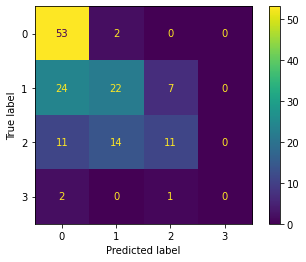

In [40]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predicted, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [41]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73        55
           1       0.58      0.42      0.48        53
           2       0.58      0.31      0.40        36
           3       0.00      0.00      0.00         3

    accuracy                           0.59       147
   macro avg       0.44      0.42      0.40       147
weighted avg       0.57      0.59      0.55       147



C:\Users\muham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
model.score(X_test, y_test)

0.5850340136054422

In [43]:
from sklearn.model_selection import cross_val_score
import numpy as np

#create a new KNN model
knn_cv = neighbors.KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=10)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.56666667 0.4        0.46666667 0.6        0.53333333 0.4
 0.53333333 0.51724138 0.48275862 0.65517241]
cv_scores mean:0.5155172413793103


C:\Users\muham\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [44]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters to tune
n_neighbors = list(range(1,10))
p = [1,2]
weights = ['uniform', 'distance']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p, weights=weights)

#Making model
clf = GridSearchCV(model, hyperparameters, cv=10)
best_model = clf.fit(X_train, y_train)

#Best Hyperparameters Value
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best weights:', best_model.best_estimator_.get_params()['weights'])

#Predict testing set
predicted2 = best_model.predict(X_test)

#Check performance using accuracy
print(accuracy_score(y_test, predicted2))

C:\Users\muham\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best p: 1
Best n_neighbors: 6
Best weights: distance
0.6122448979591837


In [45]:
best_model.score(X_test, y_test)

0.6122448979591837

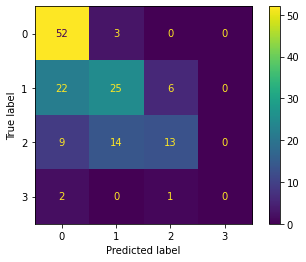

In [46]:
predicted3 = best_model.predict(X_test)

cm = confusion_matrix(y_test, predicted3, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.show()